# Solution of the 2D Poisson problem using our own FEM code

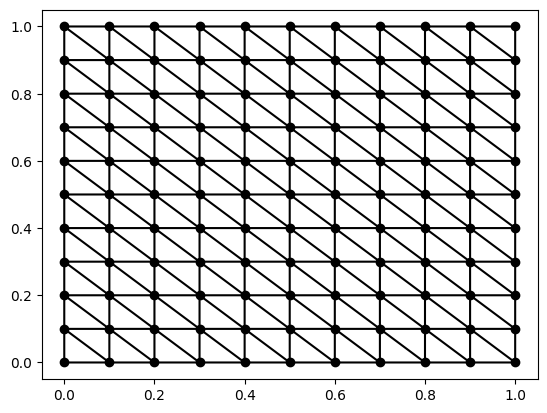

[[0.  0. ]
 [0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]
 [0.  0.1]
 [0.1 0.1]
 [0.2 0.1]
 [0.3 0.1]
 [0.4 0.1]
 [0.5 0.1]
 [0.6 0.1]
 [0.7 0.1]
 [0.8 0.1]
 [0.9 0.1]
 [1.  0.1]
 [0.  0.2]
 [0.1 0.2]
 [0.2 0.2]
 [0.3 0.2]
 [0.4 0.2]
 [0.5 0.2]
 [0.6 0.2]
 [0.7 0.2]
 [0.8 0.2]
 [0.9 0.2]
 [1.  0.2]
 [0.  0.3]
 [0.1 0.3]
 [0.2 0.3]
 [0.3 0.3]
 [0.4 0.3]
 [0.5 0.3]
 [0.6 0.3]
 [0.7 0.3]
 [0.8 0.3]
 [0.9 0.3]
 [1.  0.3]
 [0.  0.4]
 [0.1 0.4]
 [0.2 0.4]
 [0.3 0.4]
 [0.4 0.4]
 [0.5 0.4]
 [0.6 0.4]
 [0.7 0.4]
 [0.8 0.4]
 [0.9 0.4]
 [1.  0.4]
 [0.  0.5]
 [0.1 0.5]
 [0.2 0.5]
 [0.3 0.5]
 [0.4 0.5]
 [0.5 0.5]
 [0.6 0.5]
 [0.7 0.5]
 [0.8 0.5]
 [0.9 0.5]
 [1.  0.5]
 [0.  0.6]
 [0.1 0.6]
 [0.2 0.6]
 [0.3 0.6]
 [0.4 0.6]
 [0.5 0.6]
 [0.6 0.6]
 [0.7 0.6]
 [0.8 0.6]
 [0.9 0.6]
 [1.  0.6]
 [0.  0.7]
 [0.1 0.7]
 [0.2 0.7]
 [0.3 0.7]
 [0.4 0.7]
 [0.5 0.7]
 [0.6 0.7]
 [0.7 0.7]
 [0.8 0.7]
 [0.9 0.7]
 [1.  0.7]
 [0.  0.8]
 [0.1 0.8]
 [0.2 0.8]

In [115]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
mesh = StructuredRectangleMesh(10, 10)
DrawMesh2D(mesh)
print(mesh.points)

On the mesh, we define a finite element space:

In [116]:
from methodsnm.fes import *
fes = P1Edge_Triangle_Space(mesh)
fes._element_dofs(6)

array([280, 116,  60])

On the mesh, with the given finite element space, we define the variational formulation:
$$
\int_{\Omega} \nabla u \cdot \nabla v dx + \int_{\Omega} u v dx = \int_{\Omega} f v dx
$$
Replacing 
* $u \leadsto u_h = \sum_j u_j \phi_j $ and
* $v \leadsto v_h = \phi_i$
we obtain a linear system:

In [117]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos ,sin

blf = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf += LaplaceIntegral(c)
blf += MassIntegral(c)
blf.assemble()

lf = LinearForm(fes)
f = GlobalFunction(lambda x: (1+pi**2)*cos(pi*x[0]), mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()

blf.matrix

In [118]:
print(blf.matrix, "\n", lf.vector)

  (0, 0)	2.0016666726418295
  (0, 110)	-2.303929616531697e-19
  (0, 220)	-2.000000009506132
  (1, 1)	2.0016666726418295
  (1, 120)	-2.303929616531697e-19
  (1, 221)	-2.000000009506132
  (2, 2)	2.001666672641828
  (2, 130)	-2.439454888092385e-19
  (2, 222)	-2.00000000950613
  (3, 3)	2.0016666726418295
  (3, 140)	-2.303929616531697e-19
  (3, 223)	-2.000000009506132
  (4, 4)	2.001666672641828
  (4, 150)	-2.439454888092385e-19
  (4, 224)	-2.00000000950613
  (5, 5)	2.001666672641828
  (5, 160)	-2.439454888092385e-19
  (5, 225)	-2.00000000950613
  (6, 6)	2.001666672641828
  (6, 170)	-2.439454888092385e-19
  (6, 226)	-2.00000000950613
  (7, 7)	2.0016666726418317
  (7, 180)	-1.8973538018496328e-19
  (7, 227)	-2.0000000095061337
  (8, 8)	2.001666672641828
  :	:
  (315, 95)	-2.000000009506131
  (315, 105)	-2.000000008996807
  (315, 169)	-2.000000008996807
  (315, 179)	-2.000000005465838
  (315, 315)	8.00333336932056
  (316, 96)	-2.000000009506131
  (316, 106)	-2.000000008996807
  (316, 179)	-2.0

Next, we solve the linear system. And we use a direct solver from scipy for that (for now):

In [119]:
uh = FEFunction(fes)
from scipy.sparse.linalg import spsolve
uh.vector = spsolve(blf.matrix, lf.vector)

Finally, we can visualize the solution:

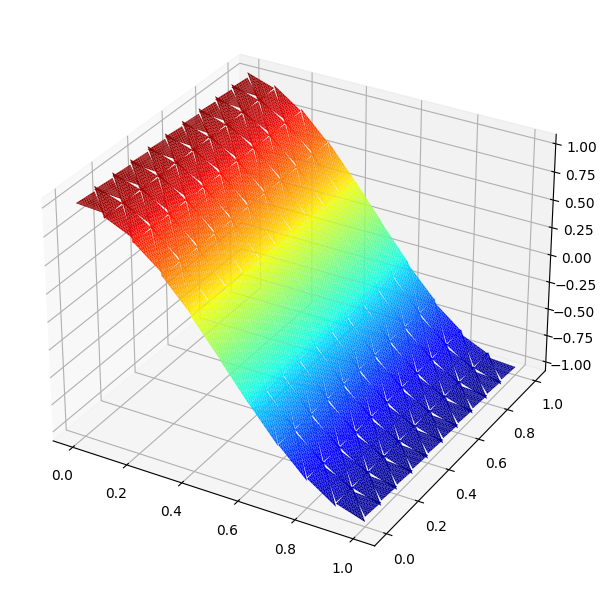

In [120]:
DrawFunction2D(uh)

This problem now contained several simplifications, that can be removed step by step:
 * qualitative evaluation only (no quantitative evaluation, no convergence study)
 * boundary conditions are natural. Different boundary conditions make it more difficult
 * 1D $\leadsto$ 2D
 * P1 (low order) discretization vs. P2 and higher order discretizations

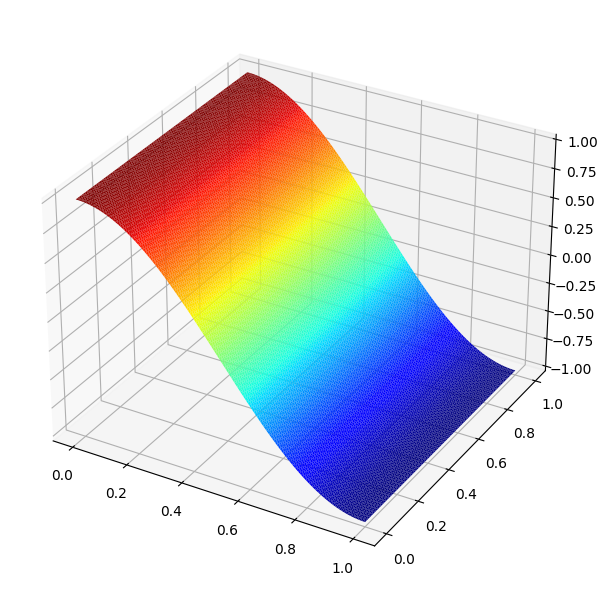

l2diff = 0.006992563727018402
[3.36339136e-05 5.80154859e-06 5.22774756e-06 4.20218394e-05
 3.96723117e-05 3.90787879e-06 1.01795745e-05 4.87821990e-05
 2.51283715e-04 4.44000571e-05 6.89155226e-06 5.53924933e-05
 8.94668079e-04 2.03040283e-04 7.35641078e-07 5.84155862e-05]
[3.36362103e-05 5.80266098e-06 5.22648172e-06 4.20177134e-05
 3.96748074e-05 3.90879210e-06 1.01778078e-05 4.87777532e-05
 2.51290000e-04 4.44031369e-05 6.89009829e-06 5.53877555e-05
 8.94679945e-04 2.03046872e-04 7.35166007e-07 5.84107207e-05]
[3.36396971e-05 5.80417917e-06 5.22494848e-06 4.20131291e-05
 3.96785960e-05 3.91003857e-06 1.01756678e-05 4.87728136e-05
 2.51299541e-04 4.44073396e-05 6.88833712e-06 5.53824914e-05
 8.94697954e-04 2.03055861e-04 7.34590698e-07 5.84053145e-05]
[3.36437065e-05 5.80587574e-06 5.22329788e-06 4.20083431e-05
 3.96829523e-05 3.91143153e-06 1.01733639e-05 4.87676566e-05
 2.51310510e-04 4.44120356e-05 6.88644111e-06 5.53769957e-05
 8.94718660e-04 2.03065906e-04 7.33971510e-07 5.8399

In [121]:
from methodsnm.forms import compute_difference_L2

uex =  GlobalFunction(lambda x: cos(pi*x[0]), mesh = mesh)
l2diff = compute_difference_L2(uh, uex, mesh, intorder = 6)
DrawFunction2D(uex)
print("l2diff =", l2diff)
sumint = 0
for elnr in range(6):
        trafo = mesh.trafo(elnr)
        intrule = select_integration_rule(6, trafo.eltype)
        uhvals = uh.evaluate(intrule.nodes, trafo)
        uexvals = uex.evaluate(intrule.nodes, trafo)
        diff = np.zeros(len(intrule.nodes))
        print((uhvals - uexvals)**2)
